# SLR MID EXAM

### Data_set: 
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm


Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

In [ ]:
# Kindly change the below cells from markdown to code and execute it 

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file)
    df=pd.read_csv("data_set.csv")

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Data Understanding (5 marks)

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK) 

b. Calculate five-point summary for numerical variables (1 MARK)

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark) 

d. Check for defects in the data such as missing values, null, outliers, etc. (2 marks) 

In [5]:
df.shape # shape of dataset

(159, 7)

In [8]:
df.info() # it gives the features information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [12]:
#b
df.describe() # It gives 5 point summary along with count,mean and std

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [14]:
#c
df_cat = [feature for feature in df.columns if df[feature].dtype=='O']
df_cat # species column is categorical


['Species']

In [16]:
df['Species'].value_counts() # it gives the number of categories for the species feature

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [18]:
#d
df.isnull().sum() # there are no outliers in the data


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [22]:
df_num = [feature for feature in df.columns if df[feature].dtype!='O']

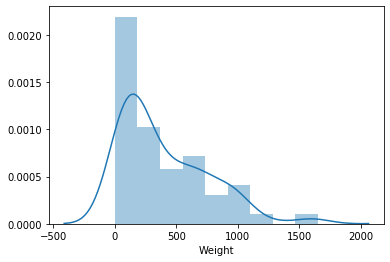

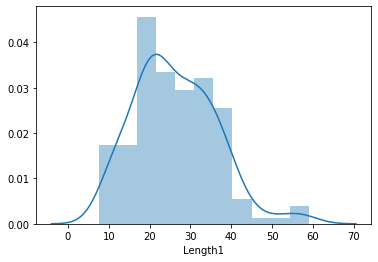

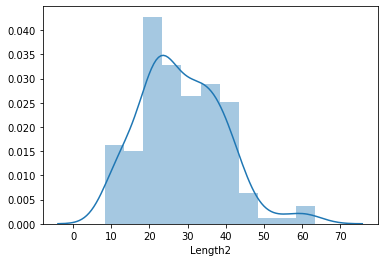

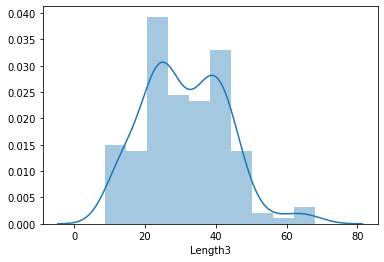

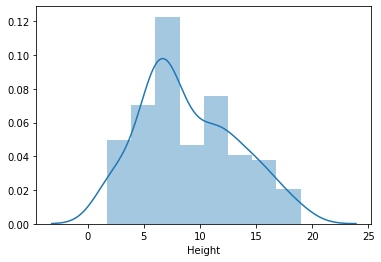

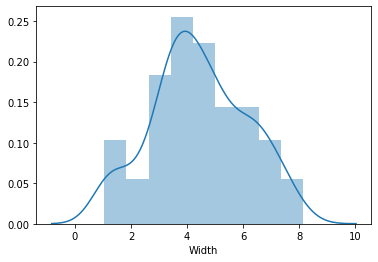

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in df_num:
    sns.distplot(df[feature])
    plt.show()

### 2. Data Preparation (10 marks) 

a. Fix the defects found above and do appropriate treatment if any. (3 marks) 

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (3 marks) 

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks) 

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (2 marks) 
 

In [24]:
#a
#from the above distplots we can see the length1,length2 and weight columns are skewed
#we can treat the outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1-1.5 * IQR))| (df > (Q3+1.5*IQR))).any(axis=1)]

In [26]:
df.shape # we can see new shape from the IQR change ..only 3 rows have been deleted

(156, 7)

In [29]:
#b
df.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895743,0.899759,0.907292,0.801871,0.923432
Length1,0.895743,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.899759,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.907292,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.801871,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.923432,0.889166,0.895584,0.897053,0.800542,1.000000


In [30]:
#from the correlation matrix we can see the variables Length1,Length2,Length3 and Height are highly correlated with the target(weight)

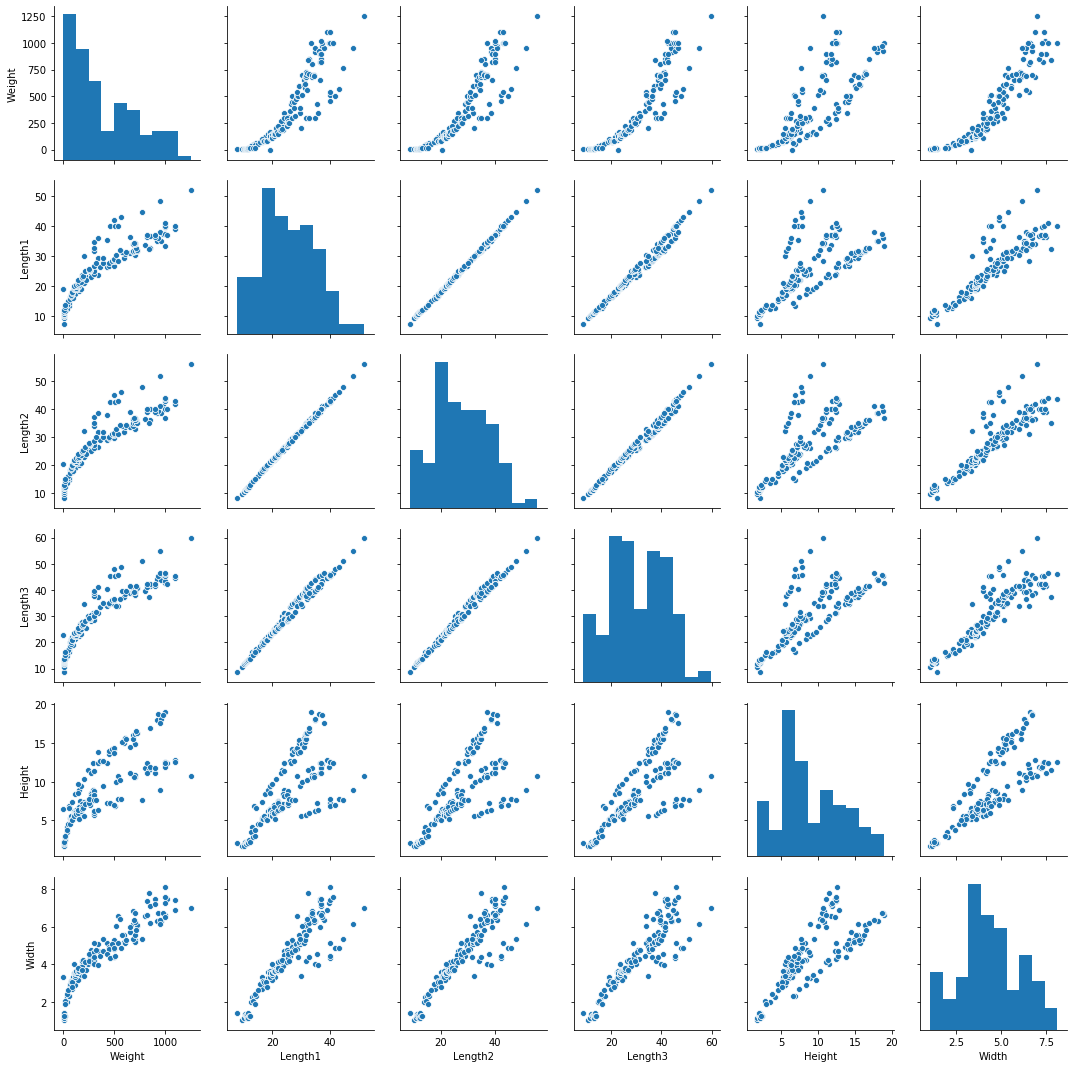

In [32]:
sns.pairplot(df)
plt.show()

In [33]:
# from the pairplot also we can see the variables Length1,Length2,Length3 and Height are having high correlation with Weight

In [34]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Length 1, Length2 and Length3 are having almost same relation with target variable(weight)
#Length3 is said as crosslength ..so we can treat that has combination of L1 nd L2 .
#we can drop Legth1 and Length2 

In [35]:
df = df.drop(labels=['Length1','Length2'],axis=1)

In [37]:
df.head()

,Species,Weight,Length3,Height,Width
0,Bream,242.0,30.0,11.5200,4.0200
1,Bream,290.0,31.2,12.4800,4.3056
2,Bream,340.0,31.1,12.3778,4.6961
3,Bream,363.0,33.5,12.7300,4.4555
4,Bream,430.0,34.0,12.4440,5.1340


In [38]:
#d
#before splitting the data into train and test. we do dummy encoding for the categorical features
dummy_variables = pd.get_dummies(df['Species'],drop_first=True,prefix='Species')

In [40]:
#now we can drop the species column from df and concat the dummy variables to df

In [41]:
df = df.drop(labels=['Species'],axis=1)

In [44]:
df = pd.concat([df,dummy_variables],axis=1)
df.head()

,Weight,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,30.0,11.5200,4.0200,0,0,0,0,0,0,0,0,0,0,0,0
1,290.0,31.2,12.4800,4.3056,0,0,0,0,0,0,0,0,0,0,0,0
2,340.0,31.1,12.3778,4.6961,0,0,0,0,0,0,0,0,0,0,0,0
3,363.0,33.5,12.7300,4.4555,0,0,0,0,0,0,0,0,0,0,0,0
4,430.0,34.0,12.4440,5.1340,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
y = df['Weight']
X=df.drop(labels=['Weight'],axis=1)

In [49]:
X.head()


,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,30.0,11.5200,4.0200,0,0,0,0,0,0,0,0,0,0,0,0
1,31.2,12.4800,4.3056,0,0,0,0,0,0,0,0,0,0,0,0
2,31.1,12.3778,4.6961,0,0,0,0,0,0,0,0,0,0,0,0
3,33.5,12.7300,4.4555,0,0,0,0,0,0,0,0,0,0,0,0
4,34.0,12.4440,5.1340,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((109, 15), (47, 15), (109,), (47,))

In [58]:
from scipy.stats import f_oneway
f_oneway(y_train,y_test)

F_onewayResult(statistic=2.372357156823872, pvalue=0.12555270914956082)

In [59]:
# from the f_one way we can say the test target variable and train target variable are significant as pval > 0.05

### 3. Model Building (15 marks) 

a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (3 marks) 

b. Check for multi-collinearity and treat the same. (2 marks) 

c. How would you improve the model? Write clearly the changes that you will make before refitting the model. Fit the final model.   (6 marks) 

d. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (2 marks)  

e. What changes from the base model had the most effect on model performance? (2 marks) 

In [62]:
#a
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [66]:
model = LinearRegression()
Xc_train = sm.add_constant(X_train)
base_model = sm.OLS(y_train,Xc_train).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     194.0
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           9.34e-59
Time:                        09:29:25   Log-Likelihood:                -611.71
No. Observations:                 109   AIC:                             1243.
Df Residuals:                      99   BIC:                             1270.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -758.1357     75.739    -10.010      0.000    -908.418    -607.853
Length3              12.9500      4.661      2.778      0.007       3.702      22.198
Height               33.0133     12.661      2.607      0.011       7.890      58.136
Width                65.3701     23.932      2.731      0.007      17.884     112.856
Species_Parkki       60.1019     20.189      2.977      0.004      20.042     100.162
Species_Perch        87.9897     35.355      2.489      0.014      17.837     158.142
Species_Pike         69.5200     59.161      1.175      0.243     -47.868     186.908
Species_Roach        67.3433     33.475      2.012      0.047       0.922     133.765
Species_Smelt       213.3419     39.551      5.394      0.000     134.863     291.820
Species_Whitefish    88.6680     34.860      2.544      0.013      19.498     157.838
Species_Parkki       60.1019     20.189      2.977      0.004      20.042     100.162
Species_Perch        87.9897     35.355      2.489      0.014      17.837     158.142
Species_Pike         69.5200     59.161      1.175      0.243     -47.868     186.908
Species_Roach        67.3433     33.475      2.012      0.047       0.922     133.765
Species_Smelt       213.3419     39.551      5.394      0.000     134.863     291.820
Species_Whitefish    88.6680     34.860      2.544      0.013      19.498     157.838
==============================================================================
Omnibus:                       37.807   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.224
Skew:                           1.258   Prob(JB):                     1.05e-22
Kurtosis:                       6.995   Cond. No.                     3.14e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
#from the summary the overall r_squared for train is 0.946
#with k_fold crossval we can check the rmse of train data
from sklearn.model_selection import cross_val_score

In [77]:
import numpy as np
model = LinearRegression()
mse = cross_val_score(model,X_train,y_train,cv=5,scoring = 'neg_mean_squared_error')
rmse = np.sqrt(np.abs(mse).mean())
print(rmse)


74.33059529116338


In [78]:
# multi collinearity

In [88]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
df_num = df[['Length3','Height','Width']]#taking only numeric columns into consideration
#df_numeric=df_numeric.drop(['Weight'],axis=1)
vif['features'] = df_num.columns
vif['VIF'] = [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]

In [89]:
vif

,features,VIF
0,Length3,41.003024
1,Height,15.029639
2,Width,49.008078


In [93]:
#the vif for width and Length are very high
vif_new = pd.DataFrame()
df_num = df[['Length3','Height']]
#df_numeric=df_numeric.drop(['Weight'],axis=1)
vif_new['features'] = df_num.columns
vif_new['VIF'] = [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif_new

,features,VIF
0,Length3,12.373244
1,Height,12.373244


In [ ]:
#the new features can be Length3 and Height

In [94]:
#c
#the model can be impored by checking the multi collinerity 
#by considering the features with pval<0.05
#by checking the auto corrilation
#by checking the skewness of target variable


In [110]:
#now we can select the features using rfe
from sklearn.feature_selection import RFE
lr= LinearRegression()
rfe_model = RFE(lr,n_features_to_select=5)
rfe_model = rfe_model.fit(X,y)
feat_index = pd.Series(data=rfe_model.ranking_,index=X.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['Width', 'Species_Smelt', 'Species_Perch', 'Species_Roach',
       'Species_Whitefish'],
      dtype='object')


In [114]:
#now consider only significant features and build the model


In [117]:
#we can include the Length 3 also 

In [125]:
X = df[['Width','Species_Smelt','Species_Perch','Species_Roach','Species_Whitefish']]
y=df['Weight']
X_sig=sm.add_constant(X)
model = sm.OLS(y,X_sig).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     349.5
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           9.79e-81
Time:                        10:25:44   Log-Likelihood:                -922.55
No. Observations:                 156   AIC:                             1857.
Df Residuals:                     150   BIC:                             1875.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -454.8087     29.766    -15.280      0.000    -513.623    -395.995
Width               198.6802      5.614     35.390      0.000     187.587     209.773
Species_Smelt        99.8686     16.787      5.949      0.000      66.700     133.037
Species_Smelt        99.8686     16.787      5.949      0.000      66.700     133.037
Species_Perch       -52.9167      8.492     -6.232      0.000     -69.696     -36.138
Species_Perch       -52.9167      8.492     -6.232      0.000     -69.696     -36.138
Species_Roach       -59.9419     12.270     -4.885      0.000     -84.187     -35.697
Species_Roach       -59.9419     12.270     -4.885      0.000     -84.187     -35.697
Species_Whitefish   -50.7891     19.626     -2.588      0.011     -89.569     -12.010
Species_Whitefish   -50.7891     19.626     -2.588      0.011     -89.569     -12.010
==============================================================================
Omnibus:                       23.186   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.686
Skew:                           0.811   Prob(JB):                     4.84e-08
Kurtosis:                       4.598   Cond. No.                     2.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.71e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
#d


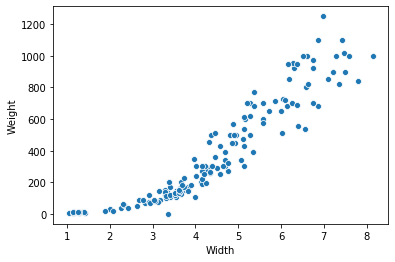

In [124]:
#we can conclude the width have a high linear relation with the target valriable
sns.scatterplot(x=df['Width'],y=df['Weight'])
plt.show()

In [ ]:
#e
#the base model has most insignificant features with pval>0.05. so we removed the insignificant features
#there is strong multi collinerity with the features as well. so we removed the multicollinerity using vif
#the best significant features to predict the target variable are selected by using the rfe feature selection